# Introduction:

👉 In real time the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of machine learning models that can help the company predict loan approval in generate decision-making process for determining whether an applicant is eligible for a loan or not.



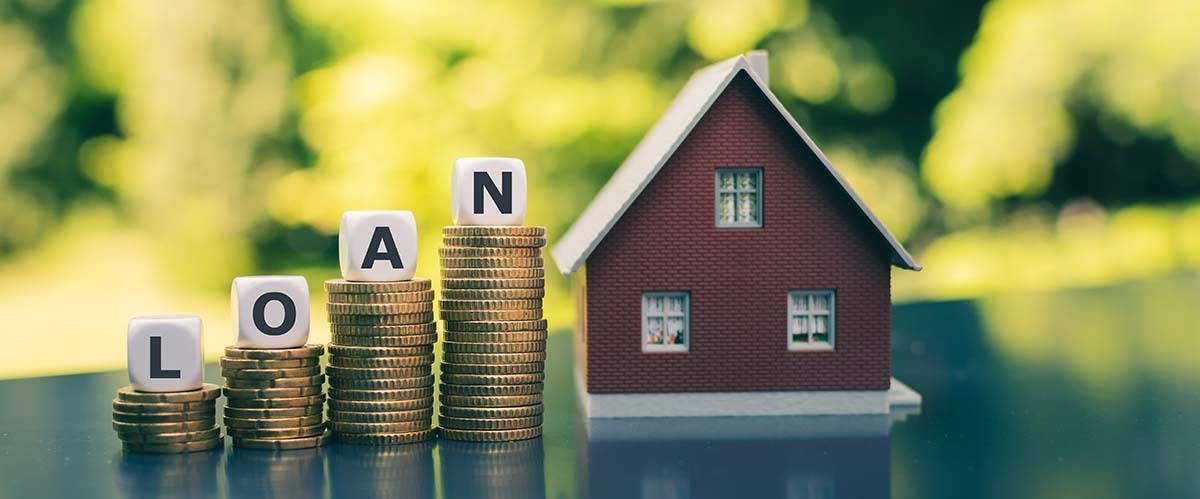

👉 Below link is for selected loan_data_set 

https://www.kaggle.com/datasets/burak3ergun/loan-data-set

👉 Importing libraries that will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# Reading Data Set: 


 👉 After importing libraries, we will also import the dataset that will be used.

In [2]:
df = pd.read_csv("D:/PYTHON/ML/project with report/Using_ML_Loan_Dataset/Loan_Data.csv")

In [3]:
df.shape

(614, 13)

👉 As can be seen in the data set 614 rows and 13 columns are present.

# Data Exploration :


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
#check for any other unusable values
print(pd.isnull(df).sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


👉so as we can see there is some null values in dataset

In [8]:
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df['Married'] = df['Married'].map({'No': 0,'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0,'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0,'Yes': 1})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0,'Y': 1})


👉 Unecessary variables will be dropped in this section.

In [9]:
df = df.drop([ 'Loan_ID', 'Property_Area'], axis=1)

In [10]:
df['Dependents']=df['Dependents'].replace('3+',4)


In [11]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1
610,0.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1


👉 we see how much columns are present in the loan data set

In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

# Data Visualization:

<AxesSubplot:title={'center':'Gender v/s Loan_Status'}, xlabel='Gender', ylabel='Loan_Status'>

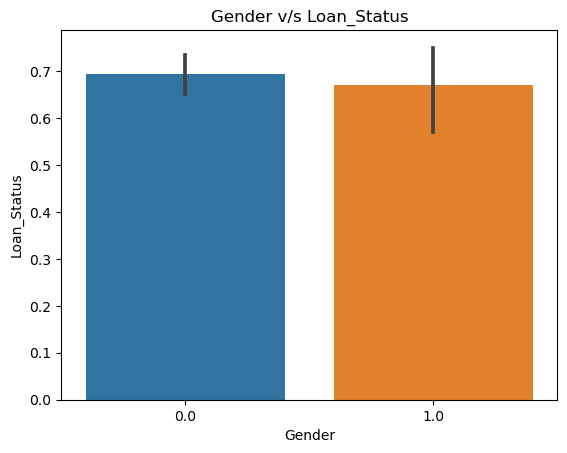

In [13]:
#draw a bar plot for Gender vs Loan_Status 

plt.title('Gender v/s Loan_Status')

sns.barplot(x="Gender", y="Loan_Status", data=df)

<AxesSubplot:title={'center':'Dependents v/s Loan_Status'}, xlabel='Dependents', ylabel='Loan_Status'>

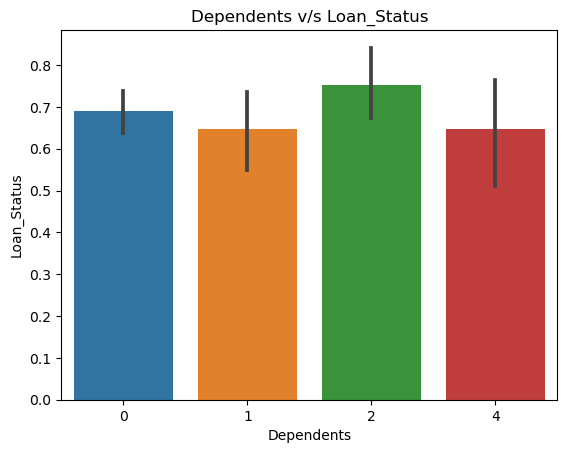

In [14]:
#draw a bar plot for Dependents vs. Loan_Status

plt.title('Dependents v/s Loan_Status')

sns.barplot(x="Dependents", y="Loan_Status", data=df)

<AxesSubplot:title={'center':'Married v/s Loan_Status'}, xlabel='Married', ylabel='Loan_Status'>

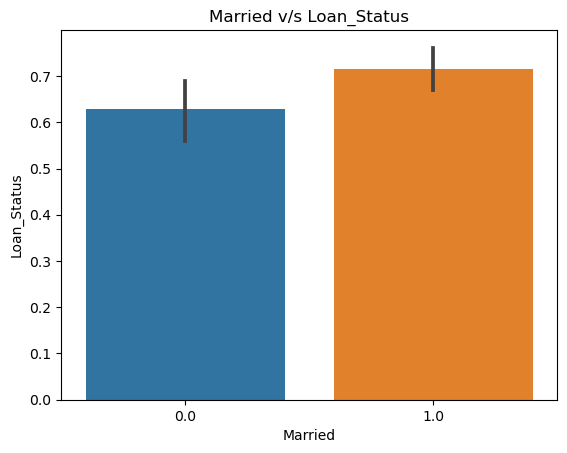

In [15]:
#draw a bar plot for Married vs. Loan_Status

plt.title('Married v/s Loan_Status')

sns.barplot(x="Married", y="Loan_Status", data=df)

<AxesSubplot:title={'center':'Education v/s Loan_Status'}, xlabel='Education', ylabel='Loan_Status'>

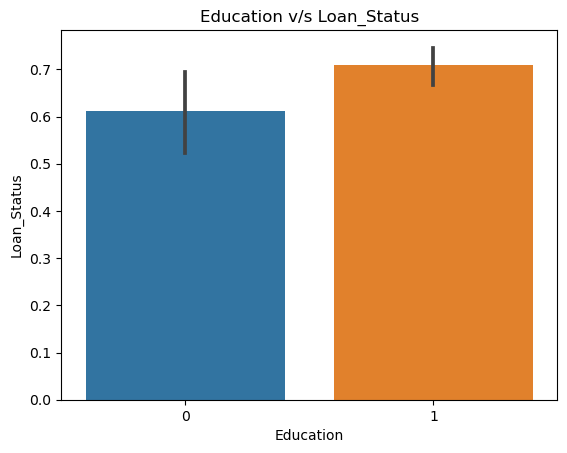

In [16]:
#draw a bar plot for Education vs. Loan_Status

plt.title('Education v/s Loan_Status')

sns.barplot(x="Education", y="Loan_Status", data=df)

<AxesSubplot:title={'center':'Self_Employed v/s Loan_Status'}, xlabel='Self_Employed', ylabel='Loan_Status'>

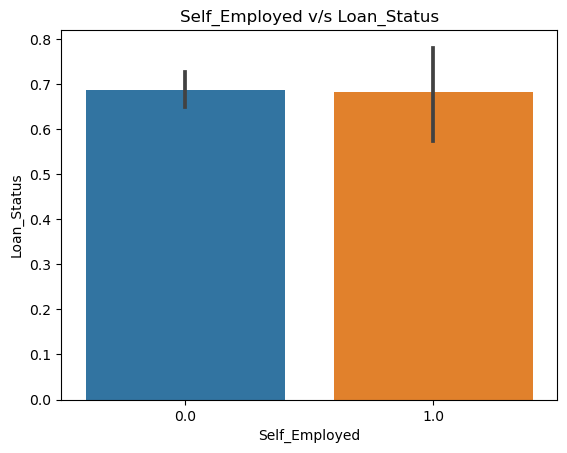

In [17]:
#draw a bar plot for Self_Employed  vs. Loan_Status

plt.title('Self_Employed v/s Loan_Status')

sns.barplot(x="Self_Employed", y="Loan_Status", data=df)

<AxesSubplot:title={'center':'Credit_History v/s Loan_Status'}, xlabel='Credit_History', ylabel='Loan_Status'>

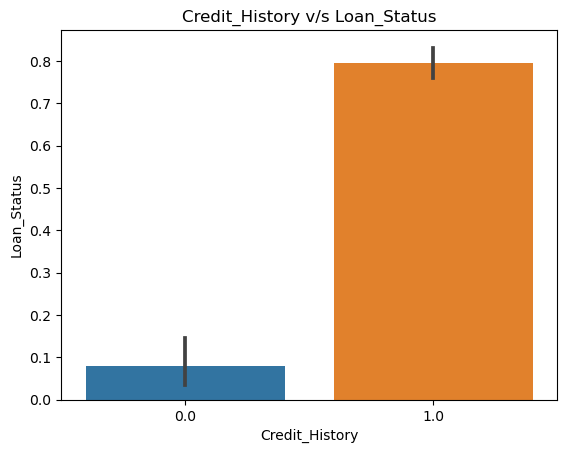

In [18]:
#draw a bar plot for Credit_History  vs. Loan_Status

plt.title('Credit_History v/s Loan_Status')

sns.barplot(x="Credit_History", y="Loan_Status", data=df)


<AxesSubplot:title={'center':'heatmap of variables'}>

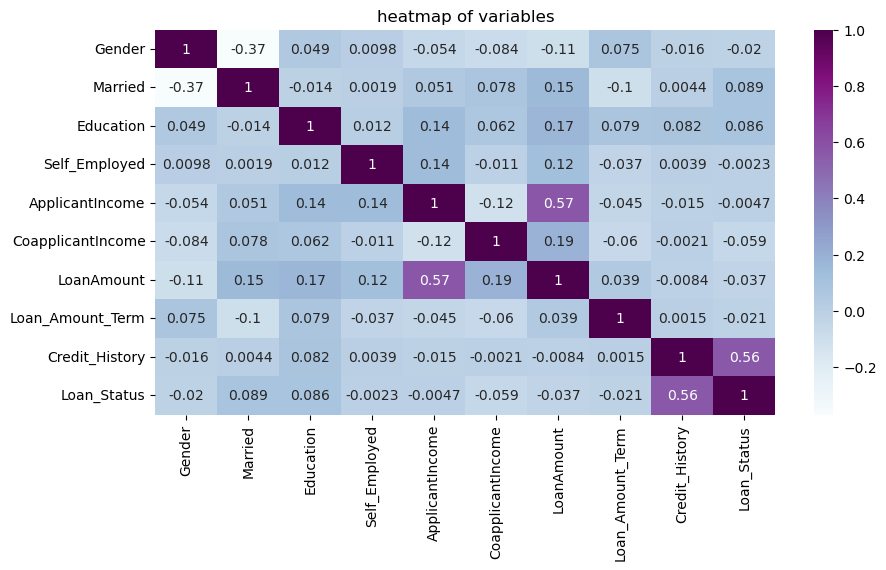

In [19]:
correlation=df.corr()
plt.figure(figsize=(10,5))
plt.title("heatmap of variables")
sns.heatmap(correlation, annot = True, cmap = 'BuPu')

👉In the above heatmap as we can analise max value is 1 and min value is -1 so which parameter is contributing and affecting the loan status.higher value of the loan_status contents to lower loan amount term. The value of the loan represents the intensity of the data.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

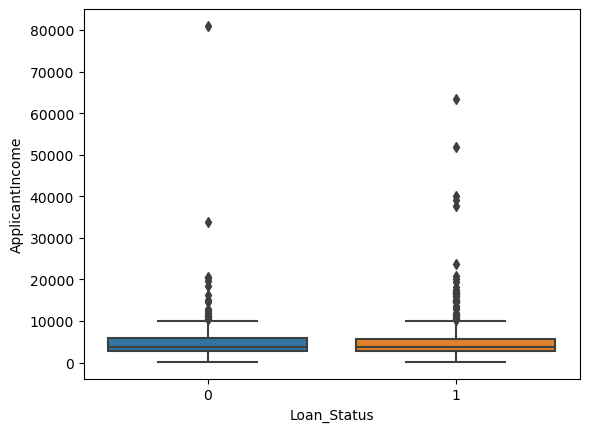

In [20]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)


👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

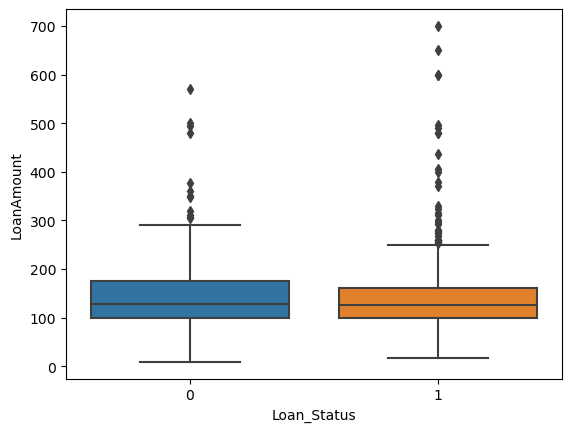

In [21]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)


👉 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

In [22]:
data = df.dropna()

# model building

# Logistic Regression:


In [23]:
# standardization of data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [24]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Loan_Status'],axis=1), 
                                                    data['Loan_Status'], test_size=0.2, 
                                                    random_state=20)

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
15,0.0,0.0,0,1,0.0,4950,0.0,125.0,360.0,1.0
602,0.0,1.0,4,1,0.0,5703,0.0,128.0,360.0,1.0
78,0.0,1.0,4,1,0.0,3167,4000.0,180.0,300.0,0.0
415,1.0,0.0,0,1,0.0,2995,0.0,60.0,360.0,1.0
472,0.0,1.0,4,1,0.0,4691,0.0,100.0,360.0,1.0


In [27]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

83.33333333333334 %


In [28]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[17, 13],
       [ 3, 63]], dtype=int64)

👉Logistic regression accuracy : 83.33 % 

# SVM (Support vector machine) classifier

In [31]:
from sklearn.svm import SVC

In [32]:
# if the data is not linerarly seperable, the SVM use a kernal function to map the data into a higher-dimentional
#space where the classes are seperable. some common kernal function include linear, polynomiall and radial basis function.
model=SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [33]:
svm_pred=model.predict(X_test)

In [34]:
print(svm_pred)

[1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0]


In [35]:
# model accuracy for X_test  
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

84.375 %


In [36]:
cm=confusion_matrix(y_test,svm_pred)
print(cm)
print()
print("clssification report\n")
print( classification_report(y_test,svm_pred))

[[17 13]
 [ 2 64]]

clssification report

              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96



👉SVM(support vector machine) classifier accuracy  : 84.37%

# KNN (k-nearest neighbours) classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# knn=KNeighbhorsClassifier(n_neighbors=42)
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [39]:
# creating confusion matrix with the help of the following script we can make predictions--
knn_prediction=knn.predict(X_test)

#next print result as follows
cm=confusion_matrix(y_test, knn_prediction)
print(classification_report(knn_prediction,y_test))
print(cm)

              precision    recall  f1-score   support

           0       0.10      0.33      0.15         9
           1       0.91      0.69      0.78        87

    accuracy                           0.66        96
   macro avg       0.50      0.51      0.47        96
weighted avg       0.83      0.66      0.73        96

[[ 3 27]
 [ 6 60]]


In [40]:
# accuracy on x_test
accuracy=knn.score(X_test, y_test)
print(accuracy*100,'%')

65.625 %


👉KNN(k_nearest neighbours)classifier accuracy : 65.62%

# naive bayes classifier

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  

In [43]:
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))
print(confusion_matrix(y_test,gnb_predictions))

86.45833333333334 %

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.86      0.95      0.91        66

    accuracy                           0.86        96
   macro avg       0.87      0.81      0.83        96
weighted avg       0.87      0.86      0.86        96

[[20 10]
 [ 3 63]]


👉 we get accuracy is 86.45% that means as compare to other model navie bays model is bestfitted on the loan data set.In naive bayes theorem it handles both continuous and discrete data. It is highly scalable with the number of predictors and data points.It is not sensitive to irrelevant features that's why is more fit in the loan data set.

👉naive bayes classifier accuracy : 86.45 % 

End